# K-means Clustering

## Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Simple K-means clustering 

### Import raw data 

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


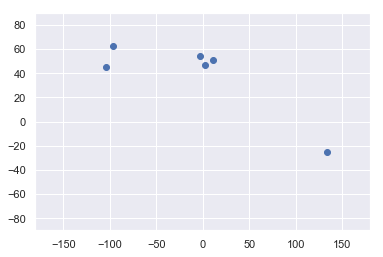

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Select the features 

In [5]:
x = data.iloc[:,1:3]
x.head()

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40


### Clustering

In [13]:
kmeans = KMeans(3) # 3 is the number of clusters

In [14]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clustering results 

In [15]:
kmeans.predict(x)

array([2, 2, 1, 1, 1, 0])

In [16]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x) #fit_predict is combination of fit and predict
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


Plot clustered points with different colors 

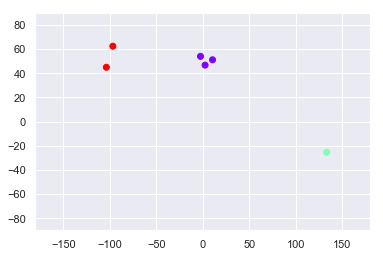

In [17]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
# c = data_with_clusters['Clusters'] means using different color depending on the values of Cluster
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## K-means Clustering with Categorical Feature

### Map the data 

In [19]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})

### Select the feature 

In [39]:
x1 = data_mapped.iloc[:,1:4]
x1

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering 

In [40]:
kmeans = KMeans(3) 
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x1) #fit_predict is combination of fit and predict
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


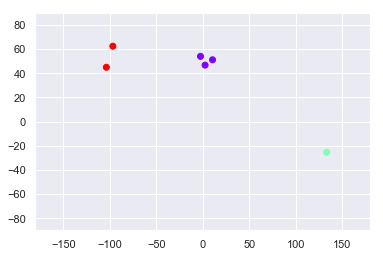

In [41]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
# c = data_with_clusters['Clusters'] means using different color depending on the values of Cluster
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

###  Changing number of clusters

1. Run with same features but different number of clusters, get different results
2. In summary, the number of clusters and choice of features would haveimpact on the outcome clustering

In [42]:
kmeans = KMeans(2) 
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x1) #fit_predict is combination of fit and predict
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


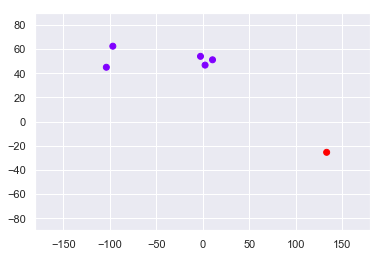

In [43]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting Number of Clusters 

Goal is to minimize WCSS and have a relatively small of number of clusters

### WCSS 

In [46]:
wcss = []
number_of_clusters = range(1,7)
for i in number_of_clusters:  # we have 6 observations
    kmeans = KMeans(i) 
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_) # calculate the wcss using inertia_ method

### Elbow method 

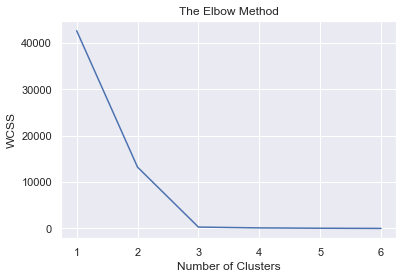

In [48]:
plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()